```
"trainer" : false,
  "commute" : false,
  "manual" : false,
  "private" : false,
  "flagged" : false,
  "gear_id" : "b12345678987654321",
  "from_accepted_tag" : false,
  "average_speed" : 6.679,
  "max_speed" : 18.5,
  "average_cadence" : 78.5,
  "average_temp" : 4,
  "average_watts" : 185.5,
  "weighted_average_watts" : 230,
  "kilojoules" : 780.5,
  "device_watts" : true,
  "has_heartrate" : false,
  "max_watts" : 743,
  "elev_high" : 446.6,
  "elev_low" : 17.2,
  "pr_count" : 0,
  "total_photo_count" : 2,
  "has_kudoed" : false,
  "workout_type" : 10,
  "suffer_score" : null,
  "description" : "",
  "calories" : 870.2,
  ```

In [ ]:
#read a single rider's TdF stage data file and parse the JSON content into a Pandas Data Frame
# visualization
import seaborn as sns
from scipy.stats import norm, skew
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import json

In [ ]:
def readRiderData(rider):
    s = pd.read_json("/content/tdf_stg14/{0}-14th-stage-Tour-de-France.json".format(rider))
    # calculate speed in km/h
    s['speed']= s['velocity_smooth']*3.6
    s['lat']=s['latlng'].apply(lambda ll: ll[0])
    s['long']=s['latlng'].apply(lambda ll: ll[1])
    return s

In [ ]:
rider = 'steven-kruijswijk'
s = readRiderData(rider)
s.head(5)

,altitude,watts_calc,latlng,velocity_smooth,cadence,grade_smooth,temp,distance,time,speed,lat,long
0,329.8,0,"[43.224048, -0.002301]",0.0,72,0.0,31,0.0,0,0.0,43.224048,-0.002301
1,329.8,0,"[43.223978, -0.002327]",0.0,79,0.0,31,8.1,1,0.0,43.223978,-0.002327
2,329.8,139,"[43.223906, -0.002353]",0.0,85,0.0,31,16.4,2,0.0,43.223906,-0.002353
3,329.8,181,"[43.22383, -0.002386]",0.0,85,0.0,31,25.2,3,0.0,43.223830,-0.002386
4,329.8,180,"[43.223753, -0.0024219999999999997]",0.0,91,3.3,31,34.3,4,0.0,43.223753,-0.002422


In [ ]:
s.sample(10)

,altitude,watts_calc,latlng,velocity_smooth,cadence,grade_smooth,temp,distance,time,speed,lat,long
5843,1295.6,712,"[42.97519, -0.278308]",5.3,93,9.5,29,56938.9,5852,19.08,42.975190,-0.278308
7215,759.8,734,"[42.985465, -0.143172]",15.7,92,-2.2,25,74278.4,7225,56.52,42.985465,-0.143172
4143,522.4,487,"[43.018763, -0.258917]",8.9,91,3.3,27,46847.1,4149,32.04,43.018763,-0.258917
2906,311.4,353,"[43.127815, -0.252644]",11.9,93,2.1,27,32743.0,2911,42.84,43.127815,-0.252644
1278,363.0,0,"[43.18624, -0.116462]",9.6,96,0.0,30,13153.5,1282,34.56,43.186240,-0.116462
468,359.2,98,"[43.19161, -0.020071]",8.2,0,0.0,32,4038.6,469,29.52,43.191610,-0.020071
9873,1095.2,1006,"[42.890606, 0.047677]",5.8,89,6.0,28,102380.7,9889,20.88,42.890606,0.047677
3074,328.8,275,"[43.109901, -0.24717599999999998]",12.6,105,2.6,27,34872.8,3079,45.36,43.109901,-0.247176
785,388.6,925,"[43.187434, -0.049519]",5.8,91,8.0,31,7022.4,787,20.88,43.187434,-0.049519
7895,472.2,185,"[42.962481, -0.07447000000000001]",8.9,88,6.1,28,84602.3,7906,32.04,42.962481,-0.074470


In [ ]:
s.sample(5)

,altitude,watts_calc,latlng,velocity_smooth,cadence,grade_smooth,temp,distance,time,speed,lat,long
2942,311.4,154,"[43.12386, -0.250533]",11.1,91,-2.0,27,33224.1,2947,39.96,43.123860,-0.250533
10659,1455.0,104,"[42.903333, 0.095623]",7.9,86,3.9,27,107007.6,10675,28.44,42.903333,0.095623
436,357.2,0,"[43.193939, -0.019205]",8.0,77,0.0,32,3770.0,437,28.80,43.193939,-0.019205
1419,368.0,280,"[43.185545, -0.137707]",10.9,76,0.0,29,14906.1,1423,39.24,43.185545,-0.137707
3310,376.8,0,"[43.090593, -0.252702]",8.3,90,3.9,26,37348.5,3316,29.88,43.090593,-0.252702


# Preparing train dataset

In [ ]:
s.shape

(12144, 12)

In [ ]:
cols = ['latlng', 'lat', 'long']
trainset = s.drop(cols, axis=1)

In [ ]:
# correlation data
correlation_matrix = trainset.corr()
correlation_matrix

,altitude,watts_calc,velocity_smooth,cadence,grade_smooth,temp,distance,time,speed
altitude,1.000000,-0.024229,-0.458996,0.065295,0.480620,-0.279858,0.719886,0.772971,-0.458996
watts_calc,-0.024229,1.000000,0.102170,0.051359,-0.054474,-0.041216,0.023945,0.019799,0.102170
velocity_smooth,-0.458996,0.102170,1.000000,-0.336659,-0.829609,-0.280787,-0.287130,-0.302159,1.000000
cadence,0.065295,0.051359,-0.336659,1.000000,0.364129,0.056526,0.123073,0.111537,-0.336659
grade_smooth,0.480620,-0.054474,-0.829609,0.364129,1.000000,0.189089,0.357269,0.368690,-0.829609
temp,-0.279858,-0.041216,-0.280787,0.056526,0.189089,1.000000,-0.485677,-0.479228,-0.280787
distance,0.719886,0.023945,-0.287130,0.123073,0.357269,-0.485677,1.000000,0.996143,-0.287130
time,0.772971,0.019799,-0.302159,0.111537,0.368690,-0.479228,0.996143,1.000000,-0.302159
speed,-0.458996,0.102170,1.000000,-0.336659,-0.829609,-0.280787,-0.287130,-0.302159,1.000000


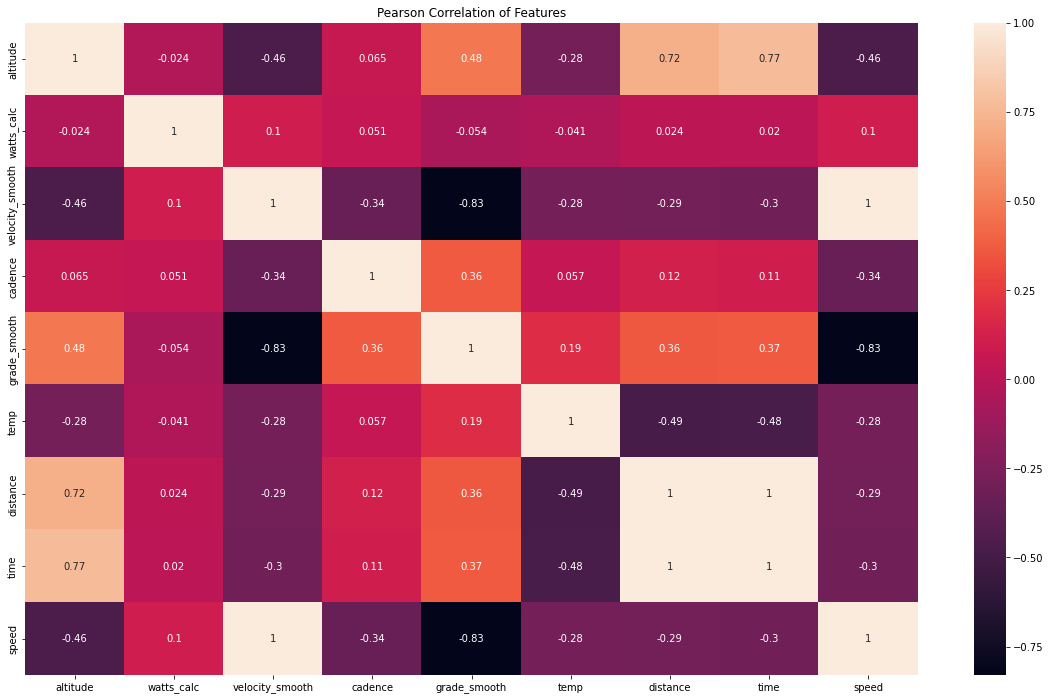

In [ ]:
plt.figure(figsize=(20.0,12.0))
plt.title('Pearson Correlation of Features')
sns.heatmap(correlation_matrix, annot=True)

In [ ]:
corr = trainset.corr()
print(corr['watts_calc'].sort_values(ascending=False)[:10], '\n')

watts_calc         1.000000
speed              0.102170
velocity_smooth    0.102170
cadence            0.051359
distance           0.023945
time               0.019799
altitude          -0.024229
temp              -0.041216
grade_smooth      -0.054474
Name: watts_calc, dtype: float64 



In [ ]:
corr = trainset.corr()
print(corr['cadence'].sort_values(ascending=False)[:10], '\n')

cadence            1.000000
grade_smooth       0.364129
distance           0.123073
time               0.111537
altitude           0.065295
temp               0.056526
watts_calc         0.051359
speed             -0.336659
velocity_smooth   -0.336659
Name: cadence, dtype: float64 



In [ ]:
corr = trainset.corr()
print(corr['speed'].sort_values(ascending=False)[:10], '\n')

speed              1.000000
velocity_smooth    1.000000
watts_calc         0.102170
temp              -0.280787
distance          -0.287130
time              -0.302159
cadence           -0.336659
altitude          -0.458996
grade_smooth      -0.829609
Name: speed, dtype: float64 



In [ ]:
trainset

,altitude,watts_calc,velocity_smooth,cadence,grade_smooth,temp,distance,time,speed
0,329.8,0,0.0,72,0.0,31,0.0,0,0.00
1,329.8,0,0.0,79,0.0,31,8.1,1,0.00
2,329.8,139,0.0,85,0.0,31,16.4,2,0.00
3,329.8,181,0.0,85,0.0,31,25.2,3,0.00
4,329.8,180,0.0,91,3.3,31,34.3,4,0.00
...,...,...,...,...,...,...,...,...,...
12139,2212.4,0,6.1,59,16.8,30,115707.4,12162,21.96
12140,2213.6,754,4.6,100,18.7,30,115709.8,12163,16.56
12141,2213.6,158,4.1,100,-31.1,30,115714.1,12164,14.76
12142,2214.8,768,3.6,0,-31.3,30,115717.8,12165,12.96


In [ ]:
trainset.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
# normalize data
from sklearn.preprocessing import StandardScaler

target_col = ['watts_calc']
X_train = trainset.drop(target_col, axis=1)
col_Z = X_train.columns # excluir la variable target
features = X_train[col_Z]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [ ]:
features

array([[-0.99043117, -2.17528527, -0.1225434 , ..., -1.78179516,
        -1.7320236 , -2.17528527],
       [-0.99043117, -2.17528527,  0.13033735, ..., -1.78156437,
        -1.73173879, -2.17528527],
       [-0.99043117, -2.17528527,  0.34709227, ..., -1.78132789,
        -1.73145397, -2.17528527],
       ...,
       [ 2.75691986, -1.23393216,  0.88897959, ...,  1.51512628,
         1.73249239, -1.23393216],
       [ 2.75930696, -1.34873132, -2.72360252, ...,  1.5152317 ,
         1.7327772 , -1.34873132],
       [ 2.31490829, -2.03752628, -2.72360252, ...,  1.53520457,
         2.07797561, -2.03752628]])

In [ ]:
y = trainset.watts_calc
X = features

In [ ]:
y

0          0
1          0
2        139
3        181
4        180
        ... 
12139      0
12140    754
12141    158
12142    768
12143      0
Name: watts_calc, Length: 12144, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                          X, y, random_state=42, test_size=.20)

In [ ]:
X_train.shape, X_test.shape

((9715, 8), (2429, 8))

In [ ]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [ ]:
model = lr.fit(X_train, y_train)

In [ ]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.013608112357583635


In [ ]:
predictions = model.predict(X_test)

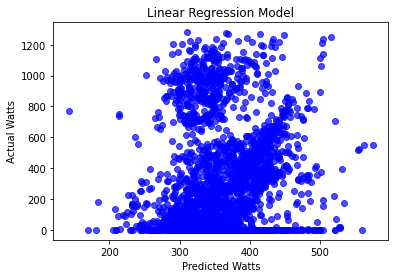

In [ ]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Watts')
plt.ylabel('Actual Watts')
plt.title('Linear Regression Model')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 115936.2560454636


In [ ]:
import statsmodels.formula.api as smf

In [ ]:
# results = smf.ols('watts_calc ~ cadence', data=features).fit()
# results.summary()